In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
# fit a logistic regression model on an imbalanced classification dataset
from sklearn.metrics import r2_score, roc_auc_score, recall_score, precision_score, accuracy_score, mean_squared_error, auc, roc_curve
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import scipy.stats as st
from joblib import dump, load
import pickle
import csv
import random
from matplotlib.transforms import Affine2D
from imblearn.over_sampling import SMOTE, ADASYN
import json
import dimod



In [37]:
with open('data/26.json') as file:
    miqubo_res = dimod.SampleSet.from_serializable(json.load(file))
miqubo_f = [x for x, y in miqubo_res.first.sample.items() if y ==1]


In [66]:
dfm = pd.read_csv("data/formatted_medical7_raw_selection5.csv",header=0, sep="\,")
dfa = pd.read_csv("data/all_features5.csv",header=0, sep="\,")
df = pd.read_csv("data/med_orginal2.csv",header=0, sep="\,")
df = df.fillna(method = "ffill")
# its only 17 features out of 27
dc_e = [
    'Graft loss 1 year',
    'AB and Dr mismatch',
    'AKI - KDIGO 2012',
    'Acute RRT initiation',
    'Another urosepsis 1 year',
    'Charlston Comorbidity Index',
    'Donor',
    'FSGS',
    'GCS',
    'Induction',
    'Next UTI - 6 months',
    'Reduction 3--> 2',
    'Reduction to steroid only',
    'Steroid bolus',
    'Transfusion [YES/NO]',
    'Tripple maintenance therapy before admission',
    'Urinary sepsis'
]

dc_c = [
    'Graft loss 1 year',
    'AKI - KDIGO 2012',
    'FSGS',
    'Reduction to steroid only',
    'Transfusion [YES/NO]',
]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [10]:
dfm

,Graft loss 1 year,AB and Dr mismatch,AKI - KDIGO 2012,Acute RRT initiation,Albumins [g/dl],Another urosepsis 1 year,CIT [min],CRP [mg/l],Charlston Comorbidity Index,Creatinine,...,PLT at discharge,Potasium [mmol/l],Reduction 3--> 2,Reduction to steroid only,Steroid bolus,Transfusion [YES/NO],Tripple maintenance therapy before admission,Urinary sepsis,eGFR -3 (MDRD-4),peak-PRA [%]
0,0,3,1,1,0.0,0,540.0,148.10,2,1.05,...,323.0,3.80,0,0,0,0,0,1,58.023466,0.0
1,0,0,1,0,0.0,0,0.0,236.93,7,4.01,...,0.0,4.50,0,0,1,0,0,1,29.979660,0.0
2,0,0,0,0,3.4,0,1380.0,99.44,3,1.22,...,187.0,4.14,0,0,0,0,0,1,56.741124,0.0
3,0,3,1,0,2.5,0,1500.0,193.08,5,3.06,...,229.0,5.85,0,0,1,0,0,1,28.016816,0.0
4,0,4,0,0,4.0,0,1320.0,14.29,5,1.89,...,134.0,4.62,0,0,0,0,0,0,32.064849,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0,4,0,0,0.0,0,1445.0,0.00,4,0.00,...,0.0,0.00,0,0,0,0,0,0,68.753531,0.0
286,0,0,0,0,0.0,0,0.0,0.00,4,0.00,...,0.0,0.00,0,0,0,0,0,0,50.846032,0.0
287,0,3,0,0,0.0,0,1948.0,0.00,4,0.00,...,0.0,0.00,0,0,0,0,0,0,25.819913,0.0
288,1,2,0,0,0.0,0,1367.0,0.00,4,0.00,...,0.0,0.00,0,0,0,0,0,0,18.031168,0.0


In [15]:
dfa[dfm.columns]

,Graft loss 1 year,AB and Dr mismatch,AKI - KDIGO 2012,Acute RRT initiation,Albumins [g/dl],Another urosepsis 1 year,CIT [min],CRP [mg/l],Charlston Comorbidity Index,Creatinine,...,PLT at discharge,Potasium [mmol/l],Reduction 3--> 2,Reduction to steroid only,Steroid bolus,Transfusion [YES/NO],Tripple maintenance therapy before admission,Urinary sepsis,eGFR -3 (MDRD-4),peak-PRA [%]
0,0,3,1,1,3.9,0,540.0,148.10,2,1.05,...,323.0,3.80,0,0,1,0,0,1,58.023466,0.0
1,0,4,1,0,3.9,0,1500.0,236.93,7,4.01,...,117.0,4.50,0,0,1,0,0,1,29.979660,0.0
2,0,2,0,0,3.4,0,1380.0,99.44,3,1.22,...,187.0,4.14,0,0,0,0,0,1,56.741124,7.0
3,0,3,1,0,2.5,0,1500.0,193.08,5,3.06,...,229.0,5.85,0,0,1,0,0,1,28.016816,0.0
4,0,4,0,0,4.0,0,1320.0,14.29,5,1.89,...,134.0,4.62,0,0,0,0,0,0,32.064849,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,4,0,0,3.5,0,1445.0,191.90,4,2.08,...,266.0,4.59,0,0,0,0,0,0,68.753531,0.0
297,0,2,0,0,4.1,0,1200.0,185.22,4,1.23,...,256.0,4.06,0,0,0,0,0,0,50.846032,0.0
298,0,3,0,0,3.1,0,1948.0,99.44,4,1.70,...,173.0,4.42,0,0,0,0,0,0,25.819913,0.0
299,1,2,0,0,3.0,0,1367.0,21.70,4,1.06,...,170.0,3.70,0,0,0,0,0,0,18.031168,41.0


In [91]:
def train_on_k_features(model_, df, target_f, mandatory_f, free_f, k, repetitions = 10, sample = True):
    print("aaaaa" + str(len(df.columns)))
    naming_map = {x[1] : "x_{}".format(x[0]) for x in enumerate(df.columns)}
    target_f = naming_map[target_f]
    mandatory_f = [naming_map[x] for x in mandatory_f]
    free_f = [naming_map[x] for x in free_f]
    df = df.copy().rename(columns=naming_map)
    y_train_pre = df.pop(target_f)

    threashold = 0.9

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    results = {}
    results["roc"] = []
    results["recall"] = []
    results["precission"] = []
    results["accurarcy"] = []
    results["mse"] = []
    results["r2"] = []

    for i in range(repetitions):
        model =  AdaBoostClassifier()
        features = mandatory_f  + random.sample(set(free_f), k) #random.choices(free_f, k = k)
        x_train, x_test, y_train, y_test = train_test_split(df[features], y_train_pre, test_size=0.2, random_state=42, shuffle=True)
        scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

        model.fit(x_train, y_train)
        # discretize predictions
        y_pred = np.where(model.predict(x_test)>threashold,1, 0)

        results["roc"].append(roc_auc_score(y_test, y_pred))
        results["recall"].append(recall_score(y_test, y_pred))
        results["precission"].append(precision_score(y_test, y_pred))
        results["accurarcy"].append(accuracy_score(y_test, y_pred))
        results["mse"].append(mean_squared_error(y_test, y_pred))
        results["r2"].append(r2_score(y_test, y_pred))

    stat_results = {}
    for key in results.keys():
        stat_results[key+"_mean"] = np.mean(results[key])
        stat_results[key+"_std"] = np.std(results[key])
    

    return stat_results

def train_on_range_features(model, df, target_f, mandatory_f, free_f, range, repetitions = 10, sample = True):
    df = df.copy()
    n_f = 1 + len(mandatory_f)
    stat_res = {}
    if sample:
        oversample = SMOTE()
        y_train = df.pop(target_f)
        x_train = df
        df_post_data, df_post_labels = oversample.fit_resample(x_train, y_train)
        df_post_data.insert(0, target_f, df_post_labels)
    for i in range:
        print(i)
        stat_res[n_f+i] = train_on_k_features(model, df_post_data.copy(), target_f, mandatory_f, free_f, i, repetitions)

    return stat_res

In [92]:
mandatory_f + random.sample(set(free_f), 0)

['Transfusion [YES/NO]',
 'FSGS',
 'Reduction to steroid only',
 'AKI - KDIGO 2012']

In [94]:
target_f = 'Graft loss 1 year'
mandatory_f = list(set(dc_c) - set([target_f]))
print(mandatory_f)
free_f = list(set(miqubo_f) - set(dc_c))

stata = train_on_range_features(AdaBoostClassifier(), df[miqubo_f + [target_f]], target_f, mandatory_f, free_f, np.arange(0, 22, 3), 3)

statm = train_on_range_features(AdaBoostClassifier(), df[miqubo_f + [target_f]], target_f, mandatory_f, free_f, np.arange(0, 22, 3), 3)

#target_f = 'Graft loss 1 year'
#mandatory_f = list(set(dc_c) - set([target_f]))
#print(mandatory_f)
#free_f = list(set(df.columns) - set(dc_c))



['Transfusion [YES/NO]', 'FSGS', 'Reduction to steroid only', 'AKI - KDIGO 2012']
0
aaaaa27


KeyboardInterrupt: 

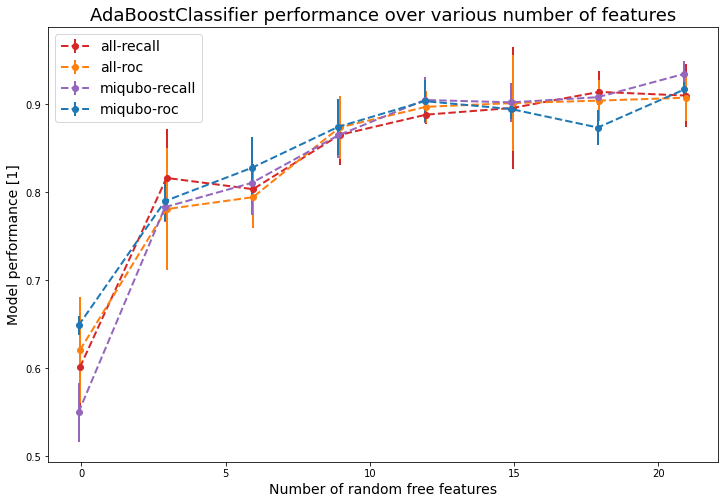

In [85]:
bar_plot_data_all = {metric_key:[y[metric_key] for _, y in  stata.items()] for metric_key in stata[list(stata.keys())[0]].keys()}
bar_plot_data_miqubo = {metric_key:[y[metric_key] for _, y in  statm.items()] for metric_key in statm[list(statm.keys())[0]].keys()}

fig, ax = plt.subplots(figsize = (12,8))
trans1 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans2 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans4 = Affine2D().translate(+0.1, 0.0) + ax.transData

x = np.arange(0, 22,3)

ax.errorbar(
        x, 
        bar_plot_data_all["recall_mean"], 
        yerr = bar_plot_data_all["recall_std"], 
        label = "all-recall",
        color='tab:red',
        linewidth = 2,
        marker="o",
        transform=trans1,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_all["roc_mean"], 
        yerr = bar_plot_data_all["roc_std"], 
        label = "all-roc",
        color='tab:orange',
        linewidth = 2,
        marker="o",
        transform=trans1,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_miqubo["recall_mean"], 
        yerr = bar_plot_data_miqubo["recall_std"], 
        label = "miqubo-recall",
        color='tab:purple',
        linewidth = 2,
        marker="o",
        transform=trans2,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_miqubo["roc_mean"], 
        yerr = bar_plot_data_miqubo["roc_std"], 
        label = "miqubo-roc",
        color='tab:blue',
        linewidth = 2,
        marker="o", shuffle=T
 
plt.title('AdaBoostClassifier performance over various number of features',  fontsize = 18)
plt.xlabel('Number of random free features',  fontsize = 14)
plt.ylabel("Model performance [1]",  fontsize = 14)
#plt.savefig("plots/general/AdaBoost_performance_over_all_features.png")
plt.show()

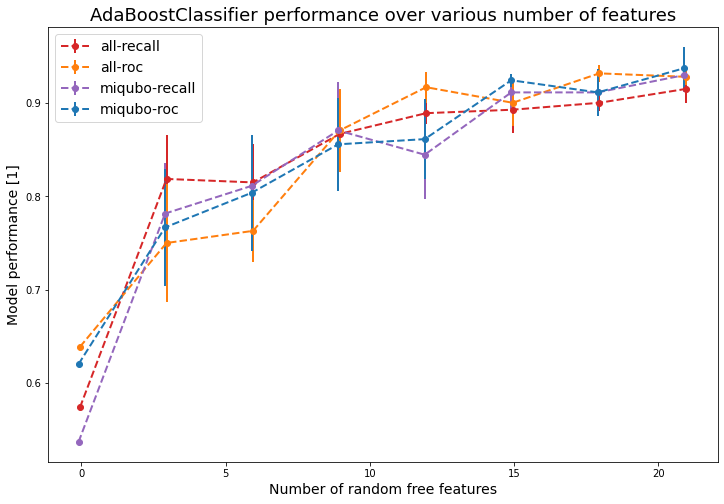

In [74]:
bar_plot_data_all = {metric_key:[y[metric_key] for _, y in  stata.items()] for metric_key in stata[list(stata.keys())[0]].keys()}
bar_plot_data_miqubo = {metric_key:[y[metric_key] for _, y in  statm.items()] for metric_key in statm[list(statm.keys())[0]].keys()}

fig, ax = plt.subplots(figsize = (12,8))
trans1 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans2 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans4 = Affine2D().translate(+0.1, 0.0) + ax.transData

x = np.arange(0, 22,3)

ax.errorbar(
        x, 
        bar_plot_data_all["recall_mean"], 
        yerr = bar_plot_data_all["recall_std"], 
        label = "all-recall",
        color='tab:red',
        linewidth = 2,
        marker="o",
        transform=trans1,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_all["roc_mean"], 
        yerr = bar_plot_data_all["roc_std"], 
        label = "all-roc",
        color='tab:orange',
        linewidth = 2,
        marker="o",
        transform=trans1,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_miqubo["recall_mean"], 
        yerr = bar_plot_data_miqubo["recall_std"], 
        label = "miqubo-recall",
        color='tab:purple',
        linewidth = 2,
        marker="o",
        transform=trans2,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_miqubo["roc_mean"], 
        yerr = bar_plot_data_miqubo["roc_std"], 
        label = "miqubo-roc",
        color='tab:blue',
        linewidth = 2,
        marker="o",
        transform=trans2,
        ls = '--')

plt.legend(loc ='upper left', fontsize = 14)
 
plt.title('AdaBoostClassifier performance over various number of features',  fontsize = 18)
plt.xlabel('Number of random free features',  fontsize = 14)
plt.ylabel("Model performance [1]",  fontsize = 14)
#plt.savefig("plots/general/AdaBoost_performance_over_all_features.png")
plt.show()

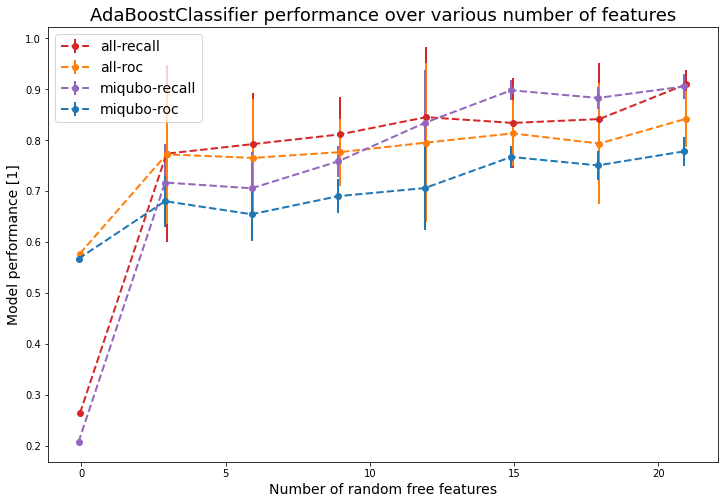

In [55]:
bar_plot_data_all = {metric_key:[y[metric_key] for _, y in  stata.items()] for metric_key in stata[list(stata.keys())[0]].keys()}
bar_plot_data_miqubo = {metric_key:[y[metric_key] for _, y in  statm.items()] for metric_key in statm[list(statm.keys())[0]].keys()}

fig, ax = plt.subplots(figsize = (12,8))
trans1 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans2 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans4 = Affine2D().translate(+0.1, 0.0) + ax.transData

x = np.arange(0, 22,3)

ax.errorbar(
        x, 
        bar_plot_data_all["recall_mean"], 
        yerr = bar_plot_data_all["recall_std"], 
        label = "all-recall",
        color='tab:red',
        linewidth = 2,
        marker="o",
        transform=trans1,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_all["roc_mean"], 
        yerr = bar_plot_data_all["roc_std"], 
        label = "all-roc",
        color='tab:orange',
        linewidth = 2,
        marker="o",
        transform=trans1,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_miqubo["recall_mean"], 
        yerr = bar_plot_data_miqubo["recall_std"], 
        label = "miqubo-recall",
        color='tab:purple',
        linewidth = 2,
        marker="o",
        transform=trans2,
        ls = '--')

ax.errorbar(
        x, 
        bar_plot_data_miqubo["roc_mean"], 
        yerr = bar_plot_data_miqubo["roc_std"], 
        label = "miqubo-roc",
        color='tab:blue',
        linewidth = 2,
        marker="o",
        transform=trans2,
        ls = '--')

plt.legend(loc ='upper left', fontsize = 14)
 
plt.title('AdaBoostClassifier performance over various number of features',  fontsize = 18)
plt.xlabel('Number of random free features',  fontsize = 14)
plt.ylabel("Model performance [1]",  fontsize = 14)
#plt.savefig("plots/general/AdaBoost_performance_over_all_features.png")
plt.show()

In [52]:
dfa[dfa.columns].equals(dfa)

True

In [50]:
df_all

NameError: name 'df_all' is not defined